A) Faça as análises e alterações necessárias na base de dados para predizer a variável Severity
Level. Verifique se a base de dados possui valores faltantes ou outliers. Caso existam, explique
as considerações e mudanças propostas.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# 1. Carregar a base de dados
df = pd.read_csv('cybersecurity_attacks.csv')

In [112]:
# Exibir informações gerais
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [113]:
# 2. Tratamento de valores faltantes
# Identificar colunas numéricas e categóricas
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Preencher valores faltantes em colunas numéricas com a média
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Preencher valores faltantes em colunas categóricas com 'desconhecido'
df[categorical_columns] = df[categorical_columns].fillna('desconhecido')

In [94]:
# Verificar se ainda existem valores nulos
print(df.isnull().sum())

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


In [78]:
print(df.head)

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

In [114]:
# 3. Tratamento da coluna Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extração de componentes úteis
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Weekday'] = df['Timestamp'].dt.day_name()

In [96]:
print(df.head)

<bound method NDFrame.head of                 Timestamp Source IP Address Destination IP Address  \
0     2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1     2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2     2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3     2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4     2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                   ...               ...                    ...   
39995 2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996 2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997 2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998 2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999 2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP        

In [115]:
# 4. Conversão de colunas categóricas para numéricas
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [98]:
print(df.head)

<bound method NDFrame.head of        Timestamp  Source IP Address  Destination IP Address  Source Port  \
0          36141                939                   37091        31225   
1           6759              35826                   33418        17245   
2          30425              32917                   19496        16811   
3          37100              12598                     592        20018   
4          37488              34515                   17716         6131   
...          ...                ...                     ...          ...   
39995      36019              25429                    4476        31005   
39996      34272              13826                   19064         2553   
39997      23705              12418                   39640        22505   
39998      39478              21631                   14638        20013   
39999      39969               7822                    2031        50137   

       Destination Port  Protocol  Packet Length  Packet 

In [116]:
# 5. Detecção e tratamento de outliers
for col in numeric_columns:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


In [117]:
# 6. Tratamento de outliers
for col in numeric_columns:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

In [118]:
# 7. Normalização dos dados
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

B) Faça um HeatMap correlacionando o número de ataques em cada dia da semana e a cada
ano. Explique os resultados obtidos.

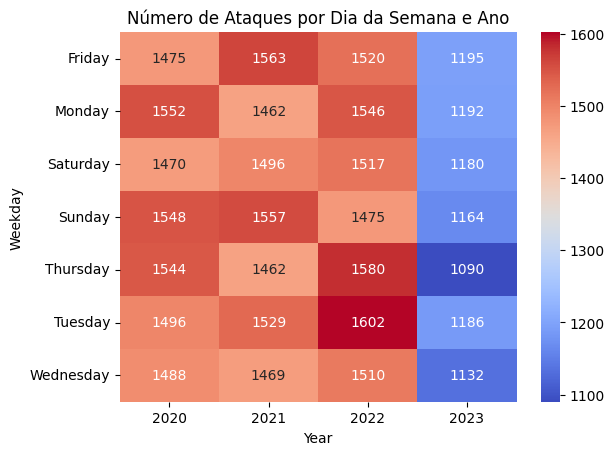

In [119]:
# 8. Criar tabela de frequência
heatmap_data = df.groupby(['Weekday', 'Year']).size().unstack()

# 9. Criar Heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
plt.title("Número de Ataques por Dia da Semana e Ano")
plt.show()

# Remover colunas auxiliares
df = df.drop(columns=['Timestamp', 'Year', 'Month', 'Day', 'DayOfWeek', 'Weekday'])

O heatmap mostra que os ataques cibernéticos são mais frequentes durante os dias úteis e caem nos finais de semana. Em 2022, houve um pico significativo de ataques, especialmente às terças-feiras, possivelmente devido a vulnerabilidades em sistemas corporativos. Em 2023, é possível perceber uma redução geral nos ataques, podendo ser devido aos avanços em segurança cibernética.


C) Divida aleatoriamente a base de dados em duas partes: treino, com 70% das amostras, e teste,
com 30%. Faça a classificação dos dados utilizando uma Rede Neural. Você deverá testar 3
topologias diferentes (números de camadas, neurônios, dropout, etc.) e explicar o porquê da
escolha de cada uma.

In [120]:
from sklearn.model_selection import train_test_split

# 10. Dividir em treino e teste
X = df.drop(columns=['Severity Level'])
y = df['Severity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 11. Construção e treinamento de modelos de redes neurais
def build_model(input_shape, neurons, dropout_rate=0.0):
    """Cria um modelo sequencial com base nos parâmetros fornecidos."""
    model = Sequential()
    model.add(Dense(neurons[0], activation='relu', input_shape=(input_shape,)))
    for n in neurons[1:]:
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        model.add(Dense(n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modelo 1: Simples
model1 = build_model(input_shape=X_train.shape[1], neurons=[64])
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Modelo 2: Com Dropout
model2 = build_model(input_shape=X_train.shape[1], neurons=[128, 64], dropout_rate=0.5)
model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Modelo 3: Complexo com mais camadas
model3 = build_model(input_shape=X_train.shape[1], neurons=[256, 128, 64])
model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3296 - loss: 72.3995
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3256 - loss: 36.0327
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3280 - loss: 32.3637
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3310 - loss: 63.3240
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3269 - loss: 41.4726
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3301 - loss: 147.0563
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3306 - loss: 29.3201
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3257 - loss: -63.9010
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3269 - loss: -11.8734
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3276 - loss: -45.7608
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3258 - loss: 104.8253
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3249 - loss: 115.3848
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3232 - loss: -51.9296
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3293 - loss: 25.2935
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3259 - loss: 149.8498
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3231 - loss: 38.2879
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3264 - loss: -152.4548
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3302 - loss: -109.9025
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3239 - loss: -218.8249
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3275 - loss: -25.9640
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3268 - loss: 113.3134
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3271 - loss: 182.4030
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3314 - loss: 32.2352
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3299 - loss: 23.3426
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3257 - loss: 4.4018
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3256 - loss: -4.7705
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3335 - loss: 3.5106
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3279 - loss: 358.7643
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3308 - loss: 58.2509
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3312 - loss: 4.9198


In [122]:
# 12. Avaliação dos modelos
print("\nModelo 1 - Avaliação:")
model1.evaluate(X_test, y_test, verbose=1)

print("\nModelo 2 - Avaliação:")
model2.evaluate(X_test, y_test, verbose=1)

print("\nModelo 3 - Avaliação:")
model3.evaluate(X_test, y_test, verbose=1)


Modelo 1 - Avaliação:
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3382 - loss: -199.7678

Modelo 2 - Avaliação:
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3380 - loss: -259.0039

Modelo 3 - Avaliação:
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3368 - loss: -41.3405


[-23.631898880004883, 0.3346666693687439]

D) Compare os resultados obtidos. O que você pode concluir?

Os resultados dos três modelos mostram que eles não foram capazes de realizar uma classificação eficiente. A acurácia em torno de 33% está muito baixa, o que indica que os modelos não conseguiram aprender padrões relevantes nos dados.